In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


In [2]:
data = pd.read_csv("../input/avocado-prices/avocado.csv")

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data.drop(["Unnamed: 0","4046","4225","4770","Date"],axis=1)

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
def getavarage(data,column):
    return sum(data[column])/len(data)

In [9]:
getavarage(data,"AveragePrice")

1.4059784097758825

In [10]:
def graph(data,ex,ye):
    plt.figure(figsize=(12,12))
    ax = sns.barplot(x=data.column1,y=data.column2,palette= "rocket")
    plt.xticks(rotation = 90)
    plt.xlabel(ex)
    plt.ylabel(ye)
    plt.title("Average" + ex + "and" + ye )
    

In [11]:
def get_avarge_between_two_columns(df,column1,column2):
   
    
    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= getavarage(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

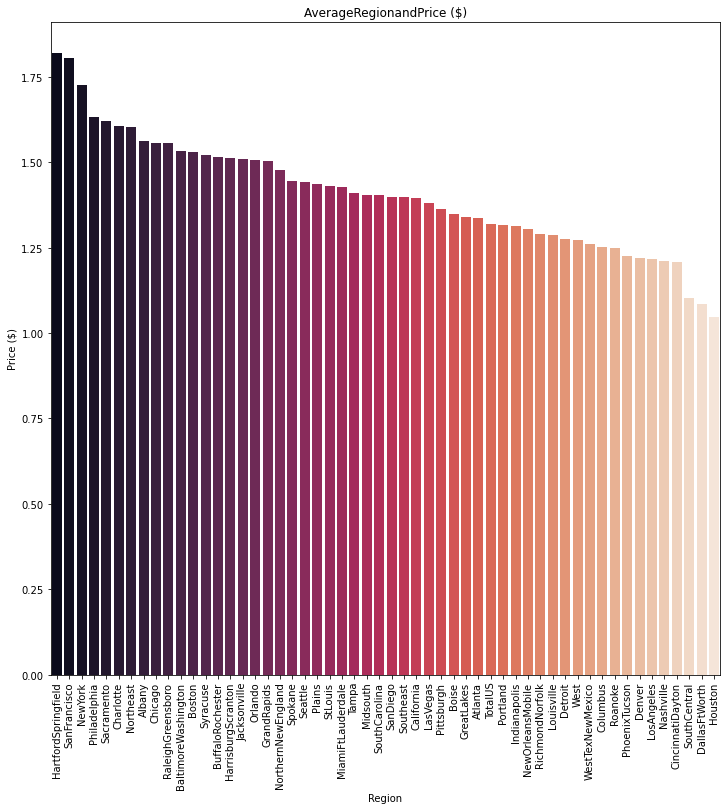

In [12]:
data1 = get_avarge_between_two_columns(data,'region','AveragePrice')
graph(data1,'Region','Price ($)')